In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"./ipl/matches.csv")

In [3]:
data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [4]:
data2008=data[data['season'] == 2008]

In [5]:
data2009=data[data['season'] == 2009]

In [6]:
data2010=data[data['season'] == 2010]

In [7]:
data2011=data[data['season'] == 2011]

In [8]:
data2012=data[data['season'] == 2012]

---------------------DATA CLEANING-------------------------------------

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               570 non-null object
date               577 non-null object
team1              577 non-null object
team2              577 non-null object
toss_winner        577 non-null object
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             574 non-null object
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 81.2+ KB


In [10]:
before_rows = data.shape[0]
print(before_rows)

577


In [11]:
del data['umpire3']
data.dropna(inplace=True)

In [12]:
after_rows = data.shape[0]
print(after_rows)

567


In [13]:
data.isnull().any()

id                 False
season             False
city               False
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner             False
win_by_runs        False
win_by_wickets     False
player_of_match    False
venue              False
umpire1            False
umpire2            False
dtype: bool

-----------------------ANALYSIS---------------------------------

In [14]:
data2009.iloc[-1].winner

'Deccan Chargers'

In [15]:
data2010.iloc[-1].winner

'Chennai Super Kings'

In [16]:
data2011.iloc[-1].winner

'Chennai Super Kings'

In [17]:
data2012.iloc[-1].winner

'Kolkata Knight Riders'

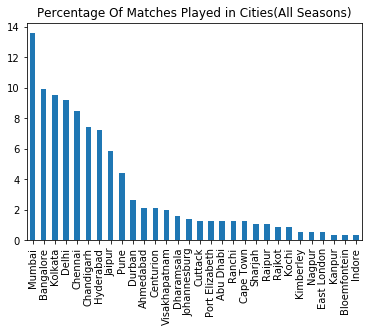

In [18]:
#Percentage of Maximum Choosen Cities
(data.city.value_counts(normalize=True) *100).plot(kind='bar',title='Percentage Of Matches Played in Cities(All Seasons)')

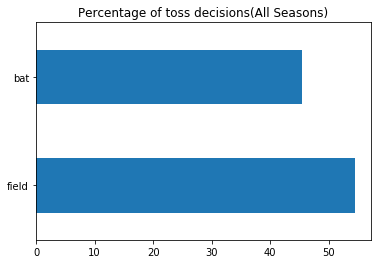

In [19]:
#Percentage of toss decisions
(data.toss_decision.value_counts(normalize=True)*100).plot(kind='barh',title='Percentage of toss decisions(All Seasons)')

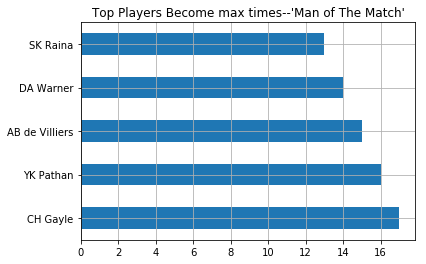

In [20]:
data.player_of_match.value_counts().head().plot(kind='barh',title="Top Players Become max times--\'Man of The Match'",grid=True) #No of the man of the match per player

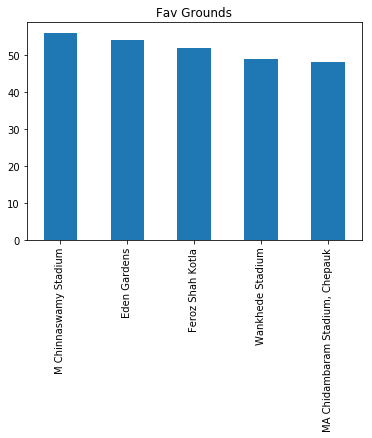

In [25]:
#Number of Maximum Choosen Venue
data.venue.value_counts().head().plot(kind='bar',title='Fav Grounds')

In [22]:
#Winning Percent of teams at Chinnaswamy Stadium
data[data.venue=='M Chinnaswamy Stadium']['winner'].value_counts(normalize=True)*100

Royal Challengers Bangalore    51.785714
Mumbai Indians                 10.714286
Kings XI Punjab                 7.142857
Chennai Super Kings             7.142857
Kolkata Knight Riders           7.142857
Delhi Daredevils                5.357143
Rajasthan Royals                5.357143
Sunrisers Hyderabad             3.571429
Deccan Chargers                 1.785714
Name: winner, dtype: float64

In [23]:
print data.win_by_runs.mean()  #Average win by runs
print data.win_by_wickets.mean()   #Average win by wicket

13.9118165785
3.38271604938


In [24]:
kkr=data[(data.team1=="Kolkata Knight Riders") |(data.team2=="Kolkata Knight Riders")]

In [25]:
#List of the cities in which the kkr played
list_of_cities=kkr.city.unique().tolist()

In [26]:
label={'Cities':{}}
for i in list_of_cities:
    b=kkr[kkr.city==i].count().tolist()[0]   #Gives the total matches played as count
    a=kkr[(kkr.city==i)&(kkr.winner=='Kolkata Knight Riders')].count().tolist()[0] #Matches in which kkr wins as count
    percentage=(float(a)/float(b))*100    #To calculate winning percentage with respect to the cities
    label['Cities'][i]=percentage


In [27]:
#Expressing in form of DataFrame
x=pd.DataFrame(label)

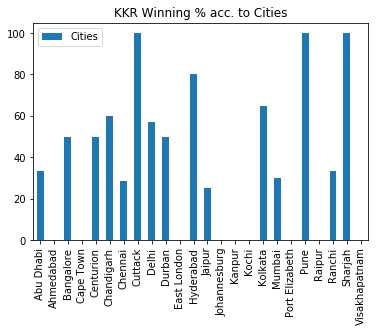

In [28]:
x.plot(kind='bar',title='KKR Winning % acc. to Cities')

In [29]:
x=data2008.groupby(['winner']).toss_decision.value_counts()

In [30]:
x

winner                       toss_decision
Chennai Super Kings          bat              6
                             field            3
Deccan Chargers              field            2
Delhi Daredevils             field            4
                             bat              3
Kings XI Punjab              field            6
                             bat              4
Kolkata Knight Riders        bat              5
                             field            1
Mumbai Indians               field            6
                             bat              1
Rajasthan Royals             field            9
                             bat              4
Royal Challengers Bangalore  bat              3
                             field            1
Name: toss_decision, dtype: int64